In [3]:
# : دریافت سابقه قیمت
import finpy_tse as fpy
#دلار آمریکا
SAVE_DATA_DOLLAR = "F://TSE_SALAR/TSE_DOLLAR.xlsx"
SAVE_DATA = "قیمت"
START_DATE='1401-01-01'
END_DATE='1401-12-05'
DATA_DOLLAR = fpy.Get_USD_RIAL(
    start_date=START_DATE,
    end_date=END_DATE,
    ignore_date=False,
    show_weekday=False,
    double_date=False)
DATA_DOLLAR.to_excel(SAVE_DATA_DOLLAR,sheet_name=SAVE_DATA)
#میانگین قیمت
DATA_DOLLAR['Price_SMA20'] = DATA_DOLLAR['Close'].rolling(20).mean()
DATA_DOLLAR['Price_SMA50'] = DATA_DOLLAR['Close'].rolling(50).mean()
DATA_DOLLAR['Price_SMA100'] = DATA_DOLLAR['Close'].rolling(100).mean()
DATA_DOLLAR['Price_SMA200'] = DATA_DOLLAR['Close'].rolling(200).mean()
DATA_DOLLAR['Price_SMA400'] = DATA_DOLLAR['Close'].rolling(400).mean()
DATA_DOLLAR['Price_SMA600'] = DATA_DOLLAR['Close'].rolling(600).mean()
DATA_DOLLAR['Price_SMA800'] = DATA_DOLLAR['Close'].rolling(800).mean()
DATA_DOLLAR['Price_LOWER_BAND'] = DATA_DOLLAR['Close'].rolling(20).mean() - 2 * DATA_DOLLAR['Close'].rolling(20).std()
DATA_DOLLAR['Price_UPPER_BAND'] = DATA_DOLLAR['Close'].rolling(20).mean() + 2 * DATA_DOLLAR['Close'].rolling(20).std()
DATA_DOLLAR.to_excel(SAVE_DATA_DOLLAR,sheet_name=SAVE_DATA)
DATA_DOLLAR['Price_SMA20'].plot(figsize=(15,10),xlabel='TIME',logy=True,legend='SMA 20',color='r')
DATA_DOLLAR['Price_SMA50'].plot(xlabel='TIME',logy=True,legend='SMA 50')
DATA_DOLLAR['Price_SMA100'].plot(xlabel='TIME',logy=True,legend='SMA 100')
DATA_DOLLAR['Price_SMA200'].plot(xlabel='TIME',logy=True,legend='SMA 200')
DATA_DOLLAR['Price_SMA400'].plot(xlabel='TIME',logy=True,legend='SMA 400')
DATA_DOLLAR['Price_SMA600'].plot(xlabel='TIME',logy=True,legend='SMA 600')
DATA_DOLLAR['Price_SMA800'].plot(xlabel='TIME',logy=True,legend='SMA 800')
DATA_DOLLAR['Price_LOWER_BAND'].plot(xlabel='TIME',logy=True,legend='LOWER_BAND',color='g')
DATA_DOLLAR['Price_UPPER_BAND'].plot(xlabel='TIME',logy=True,legend='UPPER_BAND',color='g')
DATA_DOLLAR['Close'].plot(xlabel='TIME',ylabel='PRICE',logy=True,color='black')

PRICE_RISK = (DATA_DOLLAR['Close'][-1]-DATA_DOLLAR['Price_LOWER_BAND'][-1])/(DATA_DOLLAR['Price_UPPER_BAND'][-1]-DATA_DOLLAR['Price_LOWER_BAND'][-1])
print('-------------------------- REPORT --------------------------')
print('        Last PRICE: ',round(DATA_DOLLAR['Close'][-1],4))
print('  Last PRICE SMA20: ',round(DATA_DOLLAR['Price_SMA20'][-1],4))
print('     BO UPPER BAND: ',round(DATA_DOLLAR['Price_UPPER_BAND'][-1],4))
print('     BO LOWER BAND: ',round(DATA_DOLLAR['Price_LOWER_BAND'][-1],4))
print('  Last PRICE SMA50: ',round(DATA_DOLLAR['Price_SMA50'][-1],4))
print(' Last PRICE SMA100: ',round(DATA_DOLLAR['Price_SMA100'][-1],4))
print(' Last PRICE SMA200: ',round(DATA_DOLLAR['Price_SMA200'][-1],4))
print(' Last PRICE SMA400: ',round(DATA_DOLLAR['Price_SMA400'][-1],4))
print(' Last PRICE SMA800: ',round(DATA_DOLLAR['Price_SMA800'][-1],4))
print('        PRICE RSIK: ',round(PRICE_RISK,2))

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'F:/'

In [ ]:
# RSI INDICATOR FOR DOLLAR
#specifying strategy parameters
import numpy as np
rsi_period = 14
ma_period = 20
rsi_oversold = 30
rsi_overbought = 70
#coding technical analysis signals
DATA_DOLLAR['Returns'] = DATA_DOLLAR['Close'].pct_change()
DATA_DOLLAR['Up'] = np.maximum(DATA_DOLLAR['Close'].diff(),0)
DATA_DOLLAR['Down'] = np.maximum(-DATA_DOLLAR['Close'].diff(),0)
DATA_DOLLAR['RS+'] = DATA_DOLLAR['Up'].rolling(rsi_period).sum()
DATA_DOLLAR['RS-'] = DATA_DOLLAR['Down'].rolling(rsi_period).sum()
DATA_DOLLAR['RSI'] = (DATA_DOLLAR['RS+']/(DATA_DOLLAR['RS+']+DATA_DOLLAR['RS-']))
DATA_DOLLAR['RSI_MA'] = DATA_DOLLAR['RSI'].rolling(ma_period).mean()
DATA_DOLLAR['RSI_UPPER_BAND'] = DATA_DOLLAR['RSI'].rolling(ma_period).mean() + 2.0 * DATA_DOLLAR['RSI'].rolling(ma_period).std()
DATA_DOLLAR['RSI_LOWER_BAND'] = DATA_DOLLAR['RSI'].rolling(ma_period).mean() - 2.0 * DATA_DOLLAR['RSI'].rolling(ma_period).std()
DATA_DOLLAR.to_excel(SAVE_DATA_DOLLAR,sheet_name=SAVE_DATA)
# RSI INDICATOR
DATA_DOLLAR['RSI'].plot(figsize=(15,10),xlabel='TIME',ylabel='RSI',color='b',secondary_y=True,legend='RSI')
DATA_DOLLAR['RSI_MA'].plot(xlabel='TIME',ylabel='RSI_MA',color='r',secondary_y=True,legend='RSI_MA')    
DATA_DOLLAR['RSI_UPPER_BAND'].plot(xlabel='TIME',ylabel='RSI_UPPER_BAND',color='g',secondary_y=True,legend='RSI_UPPER_BAND')  
DATA_DOLLAR['RSI_LOWER_BAND'].plot(xlabel='TIME',ylabel='RSI_LOWER_BAND',color='g',secondary_y=True,legend='RSI_LOWER_BAND')


RSI_RISK = (DATA_DOLLAR['RSI'][-1]-DATA_DOLLAR['RSI_LOWER_BAND'][-1])/(DATA_DOLLAR['RSI_UPPER_BAND'][-1]-DATA_DOLLAR['RSI_LOWER_BAND'][-1])
print('-------------------------- REPORT --------------------------')
print('           LAST RSI: ',round(DATA_DOLLAR['RSI'][-1],4))
print('        LAST RSI MA: ',round(DATA_DOLLAR['RSI_MA'][-1],4))
print('     RSI UPPER BAND: ',round(DATA_DOLLAR['RSI_UPPER_BAND'][-1],4))
print('     RSI LOWER BAND: ',round(DATA_DOLLAR['RSI_LOWER_BAND'][-1],4))
print('           RSI RSIK: ',round(RSI_RISK,2))

In [ ]:
#شاخص کل
SAVE_DATA_INDEX_KOL = "F://TSE_SALAR/TSE_INDEX_KOL.xlsx"
SAVE_DATA = "قیمت"
DATA = fpy.Get_CWI_History(
    start_date=START_DATE,
    end_date=END_DATE,
    ignore_date=False,
    just_adj_close=False,
    show_weekday=False,
    double_date=False)
DATA.to_excel(SAVE_DATA_INDEX_KOL,sheet_name=SAVE_DATA)
#میانگین قیمت
DATA['Price_SMA20'] = DATA['Adj Close'].rolling(20).mean()
DATA['Price_SMA50'] = DATA['Adj Close'].rolling(50).mean()
DATA['Price_SMA100'] = DATA['Adj Close'].rolling(100).mean()
DATA['Price_SMA200'] = DATA['Adj Close'].rolling(200).mean()
DATA['Price_SMA400'] = DATA['Adj Close'].rolling(400).mean()
DATA['Price_SMA600'] = DATA['Adj Close'].rolling(600).mean()
DATA['Price_SMA800'] = DATA['Adj Close'].rolling(800).mean()
DATA['Price_LOWER_BAND'] = DATA['Adj Close'].rolling(20).mean() - 2.0 * DATA['Adj Close'].rolling(20).std()
DATA['Price_UPPER_BAND'] = DATA['Adj Close'].rolling(20).mean() + 2.0 * DATA['Adj Close'].rolling(20).std()
DATA.to_excel(SAVE_DATA_INDEX_KOL,sheet_name=SAVE_DATA)
DATA['Price_SMA20'].plot(figsize=(15,10),xlabel='TIME',logy=True,legend='SMA 20')
DATA['Price_SMA50'].plot(xlabel='TIME',logy=True,legend='SMA 50')
DATA['Price_SMA100'].plot(xlabel='TIME',logy=True,legend='SMA 100')
DATA['Price_SMA200'].plot(xlabel='TIME',logy=True,legend='SMA 200')
DATA['Price_SMA400'].plot(xlabel='TIME',logy=True,legend='SMA 400')
DATA['Price_SMA600'].plot(xlabel='TIME',logy=True,legend='SMA 600')
DATA['Price_SMA800'].plot(xlabel='TIME',logy=True,legend='SMA 800')
DATA['Price_LOWER_BAND'].plot(xlabel='TIME',logy=True,legend='LOWER_BAND',color='g')
DATA['Price_UPPER_BAND'].plot(xlabel='TIME',logy=True,legend='UPPER_BAND',color='g')
DATA['Adj Close'].plot(xlabel='TIME',ylabel='PRICE',logy=True,color='black')
#حجم نماد
DATA['Volume'].plot.bar(xlabel='TIME',ylabel='VOLUME',secondary_y=True,legend='Volume',color='g')
DATA['Volume_SMA20'] = DATA['Volume'].rolling(20).mean()
DATA['Volume_SMA20'].plot(xlabel='TIME',legend='SMA 20',secondary_y=True,color='b')

PRICE_RISK = (DATA['Adj Close'][-1]-DATA['Price_LOWER_BAND'][-1])/(DATA['Price_UPPER_BAND'][-1]-DATA['Price_LOWER_BAND'][-1])
print('-------------------------- REPORT --------------------------')
print('        Last PRICE: ',round(DATA['Adj Close'][-1],4))
print('  Last PRICE SMA20: ',round(DATA['Price_SMA20'][-1],4))
print('     BO UPPER BAND: ',round(DATA['Price_UPPER_BAND'][-1],4))
print('     BO LOWER BAND: ',round(DATA['Price_LOWER_BAND'][-1],4))
print('  Last PRICE SMA50: ',round(DATA['Price_SMA50'][-1],4))
print(' Last PRICE SMA100: ',round(DATA['Price_SMA100'][-1],4))
print(' Last PRICE SMA200: ',round(DATA['Price_SMA200'][-1],4))
print(' Last PRICE SMA400: ',round(DATA['Price_SMA400'][-1],4))
print(' Last PRICE SMA800: ',round(DATA['Price_SMA800'][-1],4))
print('        PRICE RSIK: ',round(PRICE_RISK,2))

In [4]:
# ارزیابی ریسک براساس مسانگین حجمی وزنی
# -----------------------
DATA['Price_SMA20'] = DATA['Adj Close'].rolling(20).mean()
DATA['Price_LOWER_BAND_20'] = DATA['Adj Close'].rolling(20).mean() - 2.0 * DATA['Adj Close'].rolling(20).std()
DATA['Price_UPPER_BAND_20'] = DATA['Adj Close'].rolling(20).mean() + 2.0 * DATA['Adj Close'].rolling(20).std()
PRICE_RETURN_20 = DATA['Adj Close'][-1]/DATA['Price_SMA20'][-1] - 1
PRICE_RISK_20 = (DATA['Adj Close'][-1]-DATA['Price_LOWER_BAND_20'][-1])/(DATA['Price_UPPER_BAND_20'][-1]-DATA['Price_LOWER_BAND_20'][-1])
# -----------------------
DATA['Price_SMA50'] = DATA['Adj Close'].rolling(50).mean()
PRICE_RETURN_50 = DATA['Adj Close'][-1]/DATA['Price_SMA50'][-1] - 1
DATA['Price_LOWER_BAND_50'] = DATA['Adj Close'].rolling(50).mean() - 2.0 * DATA['Adj Close'].rolling(50).std()
DATA['Price_UPPER_BAND_50'] = DATA['Adj Close'].rolling(50).mean() + 2.0 * DATA['Adj Close'].rolling(50).std()
PRICE_RISK_50 = (DATA['Adj Close'][-1]-DATA['Price_LOWER_BAND_50'][-1])/(DATA['Price_UPPER_BAND_50'][-1]-DATA['Price_LOWER_BAND_50'][-1])
# -----------------------
DATA['Price_SMA100'] = DATA['Adj Close'].rolling(100).mean()
PRICE_RETURN_100 = DATA['Adj Close'][-1]/DATA['Price_SMA100'][-1] -1
DATA['Price_LOWER_BAND_100'] = DATA['Adj Close'].rolling(100).mean() - 2.0 * DATA['Adj Close'].rolling(100).std()
DATA['Price_UPPER_BAND_100'] = DATA['Adj Close'].rolling(100).mean() + 2.0 * DATA['Adj Close'].rolling(100).std()
PRICE_RISK_100 = (DATA['Adj Close'][-1]-DATA['Price_LOWER_BAND_100'][-1])/(DATA['Price_UPPER_BAND_100'][-1]-DATA['Price_LOWER_BAND_100'][-1])
# -----------------------
DATA['Price_SMA200'] = DATA['Adj Close'].rolling(200).mean()
PRICE_RETURN_200 = DATA['Adj Close'][-1]/DATA['Price_SMA200'][-1] -1
DATA['Price_LOWER_BAND_200'] = DATA['Adj Close'].rolling(200).mean() - 2.0 * DATA['Adj Close'].rolling(200).std()
DATA['Price_UPPER_BAND_200'] = DATA['Adj Close'].rolling(200).mean() + 2.0 * DATA['Adj Close'].rolling(200).std()
PRICE_RISK_200 = (DATA['Adj Close'][-1]-DATA['Price_LOWER_BAND_200'][-1])/(DATA['Price_UPPER_BAND_200'][-1]-DATA['Price_LOWER_BAND_200'][-1])
# -----------------------
DATA['Price_SMA400'] = DATA['Adj Close'].rolling(400).mean()
PRICE_RETURN_400 = DATA['Adj Close'][-1]/DATA['Price_SMA400'][-1] -1
DATA['Price_LOWER_BAND_400'] = DATA['Adj Close'].rolling(400).mean() - 2.0 * DATA['Adj Close'].rolling(400).std()
DATA['Price_UPPER_BAND_400'] = DATA['Adj Close'].rolling(400).mean() + 2.0 * DATA['Adj Close'].rolling(400).std()
PRICE_RISK_400 = (DATA['Adj Close'][-1]-DATA['Price_LOWER_BAND_400'][-1])/(DATA['Price_UPPER_BAND_400'][-1]-DATA['Price_LOWER_BAND_400'][-1])
# -----------------------
DATA['Price_SMA600'] = DATA['Adj Close'].rolling(600).mean()
PRICE_RETURN_600 = DATA['Adj Close'][-1]/DATA['Price_SMA600'][-1] -1
DATA['Price_LOWER_BAND_600'] = DATA['Adj Close'].rolling(600).mean() - 2.0 * DATA['Adj Close'].rolling(600).std()
DATA['Price_UPPER_BAND_600'] = DATA['Adj Close'].rolling(600).mean() + 2.0 * DATA['Adj Close'].rolling(600).std()
PRICE_RISK_600 = (DATA['Adj Close'][-1]-DATA['Price_LOWER_BAND_600'][-1])/(DATA['Price_UPPER_BAND_600'][-1]-DATA['Price_LOWER_BAND_600'][-1])
# -----------------------
DATA['Price_SMA800'] = DATA['Adj Close'].rolling(800).mean()
PRICE_RETURN_800 = DATA['Adj Close'][-1]/DATA['Price_SMA800'][-1] -1
DATA['Price_LOWER_BAND_800'] = DATA['Adj Close'].rolling(800).mean() - 2.0 * DATA['Adj Close'].rolling(800).std()
DATA['Price_UPPER_BAND_800'] = DATA['Adj Close'].rolling(800).mean() + 2.0 * DATA['Adj Close'].rolling(800).std()
PRICE_RISK_800 = (DATA['Adj Close'][-1]-DATA['Price_LOWER_BAND_800'][-1])/(DATA['Price_UPPER_BAND_800'][-1]-DATA['Price_LOWER_BAND_800'][-1])

MUL_20 = 0.025
MUL_50 = 0.0625
MUL_100 = 0.125
MUL_200 = 0.25
MUL_400 = 0.5
MUL_600 = 0.75
MUL_800 = 1

#SUMPRO = (MUL_20*PRICE_RETURN_20*PRICE_RISK_20 + MUL_50*PRICE_RETURN_50*PRICE_RISK_50 + MUL_100*PRICE_RETURN_100*PRICE_RISK_100 + MUL_200*PRICE_RETURN_200*PRICE_RISK_200 + MUL_400*PRICE_RETURN_400*PRICE_RISK_400 + MUL_600*PRICE_RETURN_600*PRICE_RISK_600 + MUL_800*PRICE_RETURN_800*PRICE_RISK_800)
#RISK = SUMPRO/(MUL_20*PRICE_RETURN_20 + MUL_50*PRICE_RETURN_50 + MUL_100*PRICE_RETURN_100 + MUL_200*PRICE_RETURN_200 + MUL_400*PRICE_RETURN_400 + MUL_600*PRICE_RETURN_600 + MUL_800*PRICE_RETURN_800)

MUL_20 = 0.1
MUL_50 = 0.25
MUL_100 = 0.5
MUL_200 = 1

SUMPRO = (MUL_20*PRICE_RETURN_20*PRICE_RISK_20 + MUL_50*PRICE_RETURN_50*PRICE_RISK_50 + MUL_100*PRICE_RETURN_100*PRICE_RISK_100 + MUL_200*PRICE_RETURN_200*PRICE_RISK_200)
RISK = SUMPRO/(MUL_20*PRICE_RETURN_20 + MUL_50*PRICE_RETURN_50 + MUL_100*PRICE_RETURN_100 + MUL_200*PRICE_RETURN_200)
print('-------------------------- REPORT --------------------------')
print('        RISK: ',round(RISK*100,2))

-------------------------- REPORT --------------------------
        RISK:  91.16


-------------------------- REPORT --------------------------
           LAST RSI:  0.7524
        LAST RSI MA:  0.3553
     RSI UPPER BAND:  0.7427
     RSI LOWER BAND:  -0.0322
           RSI RSIK:  1.01


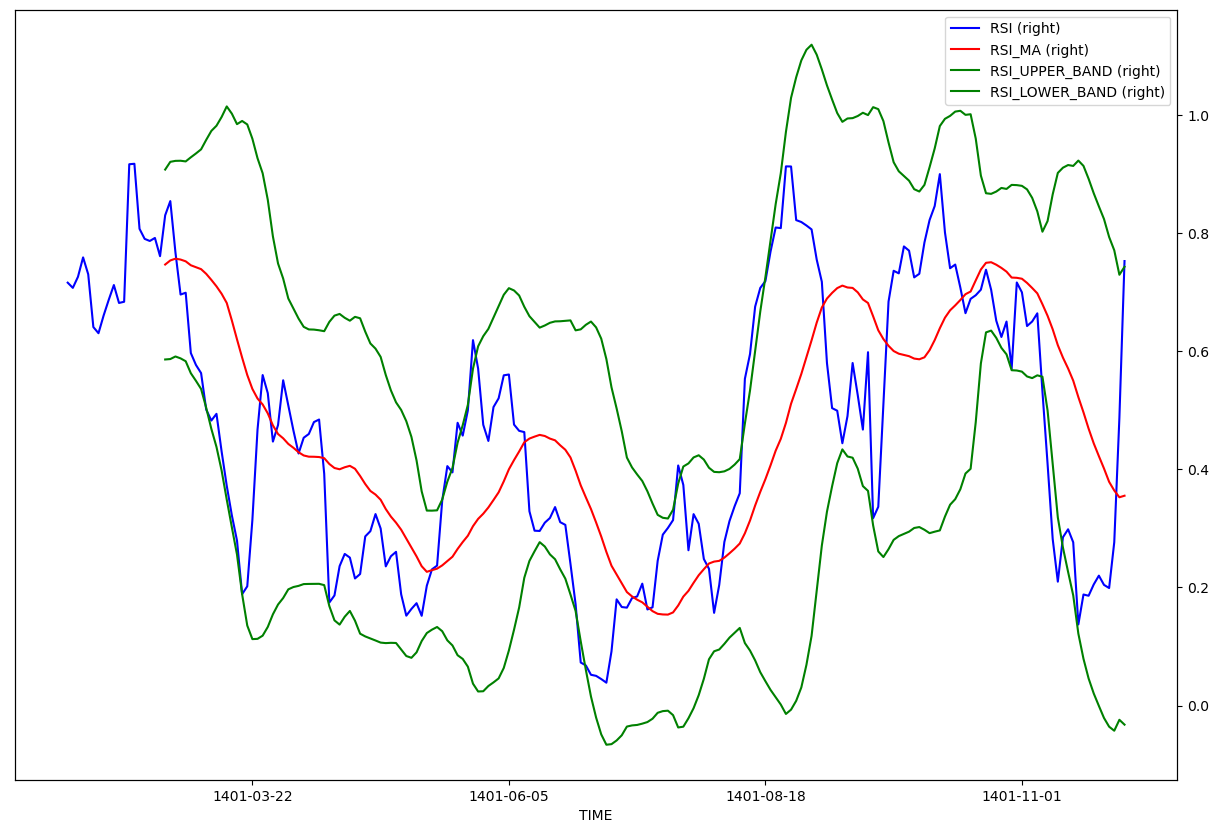

In [5]:
# RSI INDICATOR FOR INDEX KOL
#specifying strategy parameters
import numpy as np
rsi_period = 14
ma_period = 20
rsi_oversold = 30
rsi_overbought = 70
#coding technical analysis signals
DATA['Returns'] = DATA['Adj Close'].pct_change()
DATA['Up'] = np.maximum(DATA['Adj Close'].diff(),0)
DATA['Down'] = np.maximum(-DATA['Adj Close'].diff(),0)
DATA['RS+'] = DATA['Up'].rolling(rsi_period).sum()
DATA['RS-'] = DATA['Down'].rolling(rsi_period).sum()
DATA['RSI'] = (DATA['RS+']/(DATA['RS+']+DATA['RS-']))
DATA['RSI_MA'] = DATA['RSI'].rolling(ma_period).mean()
DATA['RSI_UPPER_BAND'] = DATA['RSI'].rolling(ma_period).mean() + 2.0 * DATA['RSI'].rolling(ma_period).std()
DATA['RSI_LOWER_BAND'] = DATA['RSI'].rolling(ma_period).mean() - 2.0 * DATA['RSI'].rolling(ma_period).std()
DATA.to_excel(SAVE_DATA_INDEX_KOL,sheet_name=SAVE_DATA)
# RSI INDICATOR
DATA['RSI'].plot(figsize=(15,10),xlabel='TIME',ylabel='RSI',color='b',secondary_y=True,legend='RSI')
DATA['RSI_MA'].plot(xlabel='TIME',ylabel='RSI_MA',color='r',secondary_y=True,legend='RSI_MA')    
DATA['RSI_UPPER_BAND'].plot(xlabel='TIME',ylabel='RSI_UPPER_BAND',color='g',secondary_y=True,legend='RSI_UPPER_BAND')  
DATA['RSI_LOWER_BAND'].plot(xlabel='TIME',ylabel='RSI_LOWER_BAND',color='g',secondary_y=True,legend='RSI_LOWER_BAND') 

RSI_RISK = (DATA['RSI'][-1]-DATA['RSI_LOWER_BAND'][-1])/(DATA['RSI_UPPER_BAND'][-1]-DATA['RSI_LOWER_BAND'][-1])
print('-------------------------- REPORT --------------------------')
print('           LAST RSI: ',round(DATA['RSI'][-1],4))
print('        LAST RSI MA: ',round(DATA['RSI_MA'][-1],4))
print('     RSI UPPER BAND: ',round(DATA['RSI_UPPER_BAND'][-1],4))
print('     RSI LOWER BAND: ',round(DATA['RSI_LOWER_BAND'][-1],4))
print('           RSI RSIK: ',round(RSI_RISK,2))

-------------------------- REPORT --------------------------
        LAST PRICE:  507074.0
  LAST PRICE SMA20:  0.0305
     BO UPPER BAND:  524925.6875
     BO LOWER BAND:  459213.9125
  LAST PRICE SMA50 PERCENT:  0.0579
 LAST PRICE SMA100 PERCENT:  0.1676
 LAST PRICE SMA200 PERCENT:  0.1973
 LAST PRICE SMA400 PERCENT:  nan
 LAST PRICE SMA800 PERCENT:  nan
                PRICE RISK:  0.73


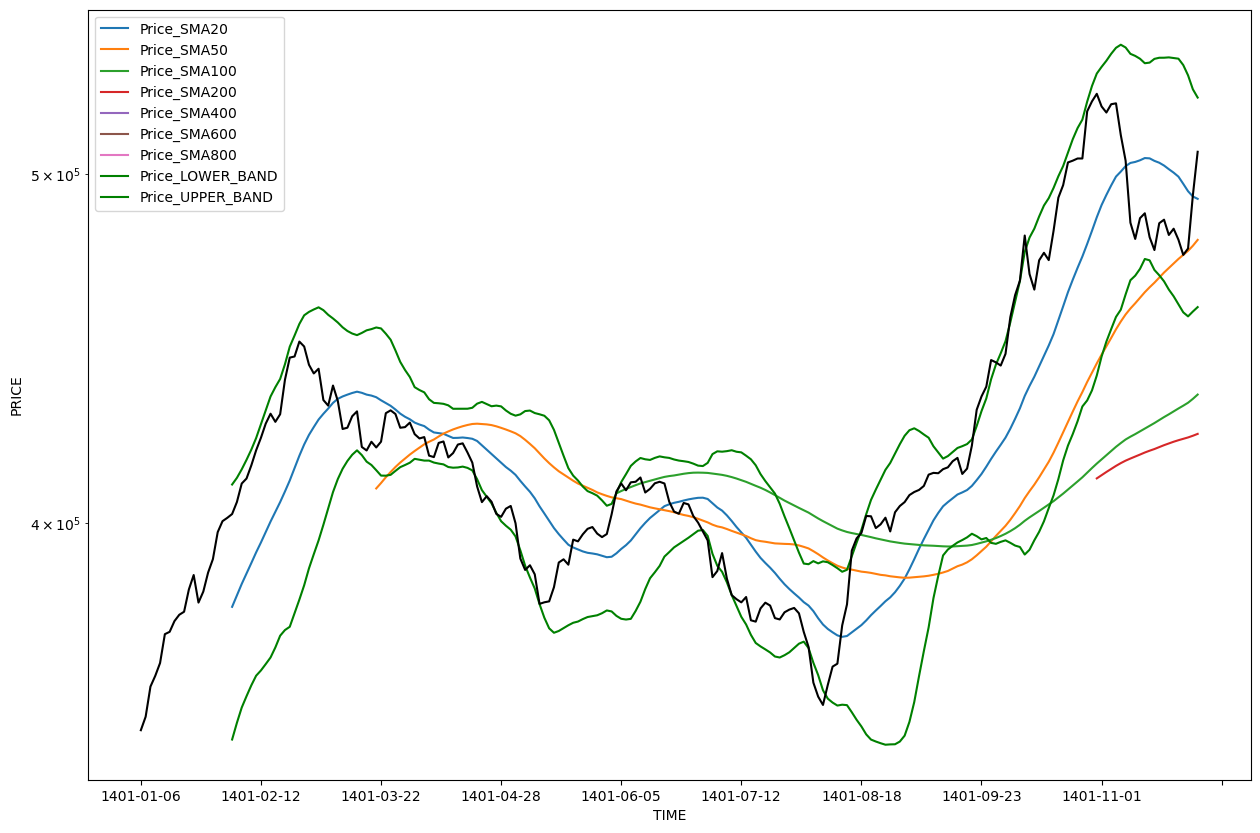

In [7]:
# شاخص هم وزن
SAVE_DATA_INDEX_HAMVAZN = "F://TSE_SALAR/TSE_INDEX_HAMVAZN.xlsx"
SAVE_DATA = "قیمت"
DATA = fpy.Get_EWI_History(
    start_date=START_DATE,
    end_date=END_DATE,
    ignore_date=False,
    just_adj_close=True,
    show_weekday=False,
    double_date=False)
DATA.to_excel(SAVE_DATA_INDEX_HAMVAZN,sheet_name=SAVE_DATA)
#میانگین قیمت
DATA['Price_SMA20'] = DATA['Adj Close'].rolling(20).mean()
DATA['Price_SMA50'] = DATA['Adj Close'].rolling(50).mean()
DATA['Price_SMA100'] = DATA['Adj Close'].rolling(100).mean()
DATA['Price_SMA200'] = DATA['Adj Close'].rolling(200).mean()
DATA['Price_SMA400'] = DATA['Adj Close'].rolling(400).mean()
DATA['Price_SMA600'] = DATA['Adj Close'].rolling(600).mean()
DATA['Price_SMA800'] = DATA['Adj Close'].rolling(800).mean() 
DATA['Price_LOWER_BAND'] = DATA['Adj Close'].rolling(20).mean() - 2.0 * DATA['Adj Close'].rolling(20).std()
DATA['Price_UPPER_BAND'] = DATA['Adj Close'].rolling(20).mean() + 2.0 * DATA['Adj Close'].rolling(20).std()
DATA.to_excel(SAVE_DATA_INDEX_HAMVAZN,sheet_name=SAVE_DATA)
DATA['Price_SMA20'].plot(figsize=(15,10),xlabel='TIME',logy=True,legend='SMA 20')
DATA['Price_SMA50'].plot(xlabel='TIME',logy=True,legend='SMA 50')
DATA['Price_SMA100'].plot(xlabel='TIME',logy=True,legend='SMA 100')
DATA['Price_SMA200'].plot(xlabel='TIME',logy=True,legend='SMA 200')
DATA['Price_SMA400'].plot(xlabel='TIME',logy=True,legend='SMA 400')
DATA['Price_SMA600'].plot(xlabel='TIME',logy=True,legend='SMA 600')
DATA['Price_SMA800'].plot(xlabel='TIME',logy=True,legend='SMA 800')
DATA['Price_LOWER_BAND'].plot(xlabel='TIME',logy=True,legend='LOWER_BAND',color='g')
DATA['Price_UPPER_BAND'].plot(xlabel='TIME',logy=True,legend='UPPER_BAND',color='g')
DATA['Adj Close'].plot(xlabel='TIME',ylabel='PRICE',logy=True,color='black')
##حجم نماد
#DATA['Volume'].plot.bar(xlabel='TIME',ylabel='VOLUME',secondary_y=True,legend='Volume',color='g')
#DATA['Volume_SMA20'] = DATA['Volume'].rolling(20).mean()
#DATA['Volume_SMA20'].plot(xlabel='TIME',legend='SMA 20',secondary_y=True)


PRICE_RISK = (DATA['Adj Close'][-1]-DATA['Price_LOWER_BAND'][-1])/(DATA['Price_UPPER_BAND'][-1]-DATA['Price_LOWER_BAND'][-1])
print('-------------------------- REPORT --------------------------')
print('        LAST PRICE: ',round(DATA['Adj Close'][-1],4))
print('  LAST PRICE SMA20: ',round(DATA['Adj Close'][-1] / DATA['Price_SMA20'][-1] - 1,4))
print('     BO UPPER BAND: ',round(DATA['Price_UPPER_BAND'][-1],4))
print('     BO LOWER BAND: ',round(DATA['Price_LOWER_BAND'][-1],4))
print('  LAST PRICE SMA50 PERCENT: ',round(DATA['Adj Close'][-1] / DATA['Price_SMA50'][-1] - 1,4))
print(' LAST PRICE SMA100 PERCENT: ',round(DATA['Adj Close'][-1] / DATA['Price_SMA100'][-1] - 1,4))
print(' LAST PRICE SMA200 PERCENT: ',round(DATA['Adj Close'][-1] / DATA['Price_SMA200'][-1] - 1,4))
print(' LAST PRICE SMA400 PERCENT: ',round(DATA['Adj Close'][-1] / DATA['Price_SMA400'][-1] - 1,4))
print(' LAST PRICE SMA800 PERCENT: ',round(DATA['Adj Close'][-1] / DATA['Price_SMA800'][-1] - 1,4))
print('                PRICE RISK: ',round(PRICE_RISK,2))

-------------------------- REPORT --------------------------


KeyError: -1

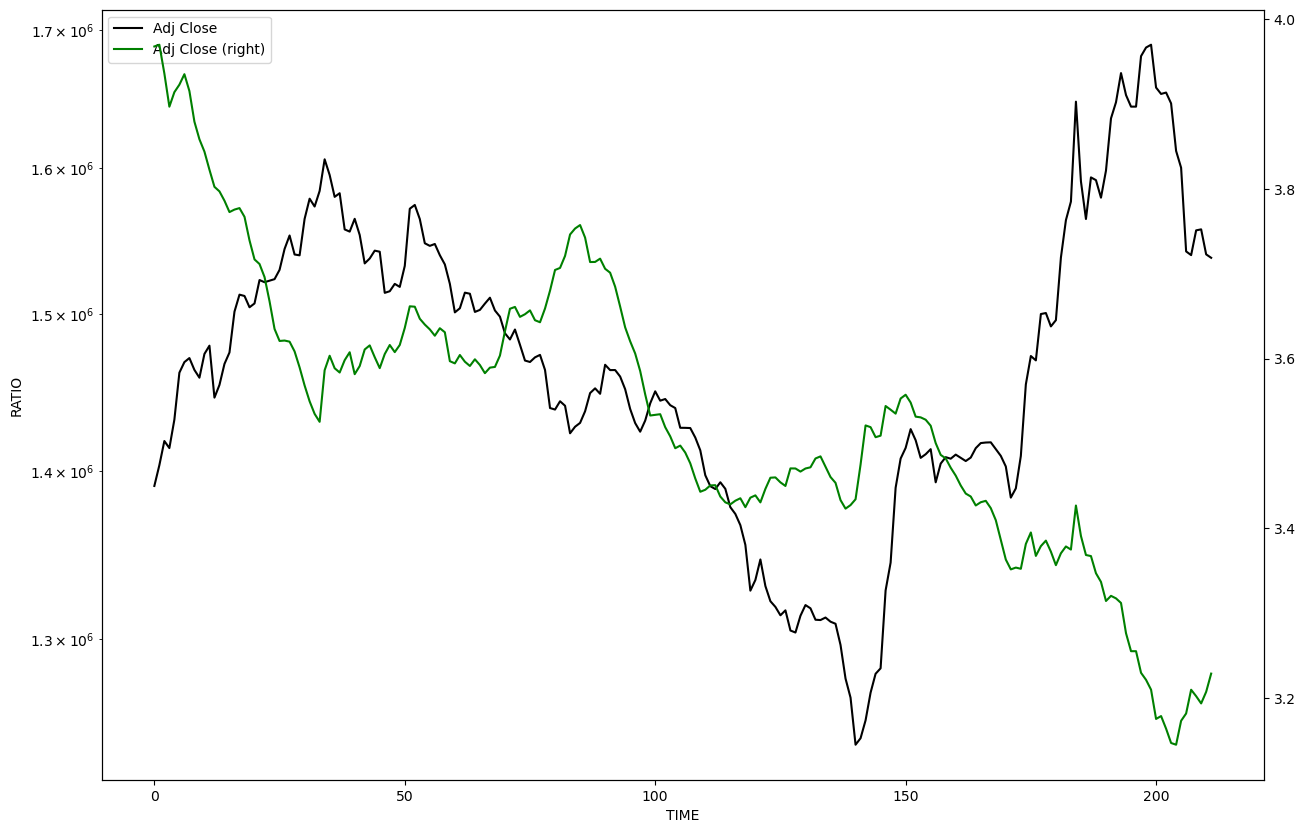

In [7]:
#نسبت شاخص کل به شاخص هم وزن
import pandas
INDEX_KOL = pandas.read_excel('F://TSE_SALAR/TSE_INDEX_KOL.xlsx', sheet_name="قیمت", usecols=['Adj Close'])
#شاخص هم وزن
INDEX_HAMVAZN = pandas.read_excel('F://TSE_SALAR/TSE_INDEX_HAMVAZN.xlsx', sheet_name="قیمت", usecols=['Adj Close'])
RATIO = INDEX_KOL['Adj Close']/INDEX_HAMVAZN['Adj Close']
INDEX_KOL['Adj Close'].plot(figsize=(15,10),xlabel='TIME',ylabel='Close',color='black',logy=True,legend='Close')
RATIO.plot(figsize=(15,10),xlabel='TIME',ylabel='RATIO',color='g',secondary_y=True,legend='RATIO')
#print(INDEX_KOL)
#print(INDEX_HAMVAZN)

print('-------------------------- REPORT --------------------------')
print('           LAST KOL: ',round(INDEX_KOL['Adj Close'][-1],4))
print('       LAST HAMVAZN: ',round(INDEX_HAMVAZN['Adj Close'][-1],4))
print('              RATIO: ',round(RATIO,2))

-------------------------- REPORT --------------------------
           LAST RSI:  0.6394
        LAST RSI MA:  0.4465
     RSI UPPER BAND:  0.9166
     RSI LOWER BAND:  -0.0237
           RSI RSIK:  0.71


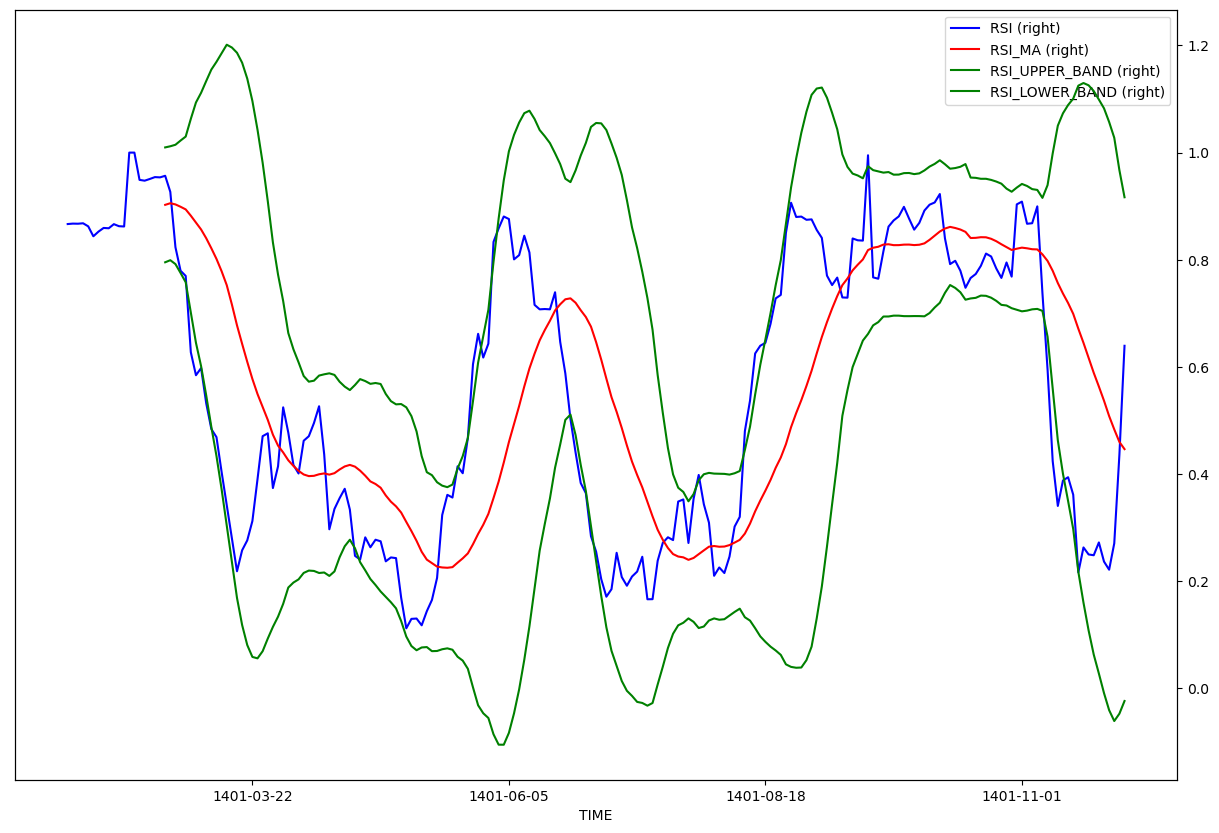

In [8]:
# RSI INDICATOR FOR INDEX HAMVAZN
#specifying strategy parameters
import numpy as np
rsi_period = 14
ma_period = 20
rsi_oversold = 30
rsi_overbought = 70
#coding technical analysis signals
DATA['Returns'] = DATA['Adj Close'].pct_change()
DATA['Up'] = np.maximum(DATA['Adj Close'].diff(),0)
DATA['Down'] = np.maximum(-DATA['Adj Close'].diff(),0)
DATA['RS+'] = DATA['Up'].rolling(rsi_period).sum()
DATA['RS-'] = DATA['Down'].rolling(rsi_period).sum()
DATA['RSI'] = (DATA['RS+']/(DATA['RS+']+DATA['RS-']))
DATA['RSI_MA'] = DATA['RSI'].rolling(ma_period).mean()
DATA['RSI_UPPER_BAND'] = DATA['RSI'].rolling(ma_period).mean() + 2.0 * DATA['RSI'].rolling(ma_period).std()
DATA['RSI_LOWER_BAND'] = DATA['RSI'].rolling(ma_period).mean() - 2.0 * DATA['RSI'].rolling(ma_period).std()
DATA.to_excel(SAVE_DATA_INDEX_HAMVAZN,sheet_name=SAVE_DATA)
# RSI INDICATOR
DATA['RSI'].plot(figsize=(15,10),xlabel='TIME',ylabel='RSI',color='b',secondary_y=True,legend='RSI')
DATA['RSI_MA'].plot(xlabel='TIME',ylabel='RSI_MA',color='r',secondary_y=True,legend='RSI_MA')    
DATA['RSI_UPPER_BAND'].plot(xlabel='TIME',ylabel='RSI_UPPER_BAND',color='g',secondary_y=True,legend='RSI_UPPER_BAND')  
DATA['RSI_LOWER_BAND'].plot(xlabel='TIME',ylabel='RSI_LOWER_BAND',color='g',secondary_y=True,legend='RSI_LOWER_BAND')


RSI_RISK = (DATA['RSI'][-1]-DATA['RSI_LOWER_BAND'][-1])/(DATA['RSI_UPPER_BAND'][-1]-DATA['RSI_LOWER_BAND'][-1])
print('-------------------------- REPORT --------------------------')
print('           LAST RSI: ',round(DATA['RSI'][-1],4))
print('        LAST RSI MA: ',round(DATA['RSI_MA'][-1],4))
print('     RSI UPPER BAND: ',round(DATA['RSI_UPPER_BAND'][-1],4))
print('     RSI LOWER BAND: ',round(DATA['RSI_LOWER_BAND'][-1],4))
print('           RSI RSIK: ',round(RSI_RISK,2))

In [ ]:
# نسبت شاخص کل به شاخص شناور آزاد 
SAVE_DATA_INDEX_SHENAVAR = "F://TSE_SALAR/TSE_INDEX_SHENAVAR.xlsx"
SAVE_DATA = "قیمت"
DATA = fpy.Get_FFI_History(
    start_date=START_DATE,
    end_date=END_DATE,
    ignore_date=False,
    just_adj_close=False,
    show_weekday=False,
    double_date=False)
DATA.to_excel(SAVE_DATA_INDEX_SHENAVAR,sheet_name=SAVE_DATA)
INDEX_SHENAVAR = pandas.read_excel(SAVE_DATA_INDEX_SHENAVAR,SAVE_DATA, usecols=['Adj Close'])
RATIO = INDEX_KOL['Adj Close']/INDEX_SHENAVAR['Adj Close']
INDEX_KOL['Adj Close'].plot(figsize=(15,10),xlabel='TIME',ylabel='Close',color='black',logy=True,legend='Close')
RATIO.plot(figsize=(15,10),xlabel='TIME',ylabel='RATIO',color='g',secondary_y=True,legend='RATIO')

print('-------------------------- REPORT --------------------------')
print('           LAST KOL: ',round(INDEX_KOL['Adj Close'][-1],4))
print('      LAST SHENAVAR: ',round(INDEX_SHENAVAR['Adj Close'][-1],4))
print('              RATIO: ',round(RATIO,2))

In [ ]:
# نسبت شاخص کل به دلار
import pandas as pd
DOLLAR = pd.read_excel(SAVE_DATA_DOLLAR,SAVE_DATA, usecols=['Close'])
RATIO = INDEX_KOL['Adj Close']/DOLLAR['Close']
INDEX_KOL['Adj Close'].plot(figsize=(15,10),xlabel='TIME',ylabel='Close',color='black',logy=True,legend='Close')
RATIO.plot(figsize=(15,10),xlabel='TIME',ylabel='RATIO',color='g',secondary_y=True,legend='RATIO')
INDEX_KOL.to_excel(SAVE_DATA_INDEX_KOL,sheet_name=SAVE_DATA)
#print(INDEX_KOL['Adj Close'])
#print(DOLLAR['Close'])
#print(INDEX_KOL['Returns_KOL_DOLLAR'])
print('-------------------------- REPORT --------------------------')
print('           LAST KOL: ',round(INDEX_KOL['Adj Close'][-1],4))
print('        LAST DOLLAR: ',round(DOLLAR['Close'][-1],4))
print('              RATIO: ',round(RATIO,2))

In [ ]:
# بازدهی شاخص هم وزن ریالی
HAMVAZN_CHANGE = INDEX_HAMVAZN['Adj Close'].pct_change()
HAMVAZN_CHANGE_CUMSUM = HAMVAZN_CHANGE.cumsum()
HAMVAZN_CHANGE_CUMSUM.plot(figsize=(15,10),xlabel='TIME',ylabel='Close',color='--g',logy=True,legend='Close')
# بازدهی شاخص کل ریالی
KOL_CHANGE = INDEX_KOL['Adj Close'].pct_change()
KOL_CHANGE_CUMSUM = KOL_CHANGE.cumsum()
KOL_CHANGE_CUMSUM.plot(figsize=(15,10),xlabel='TIME',ylabel='Close',color='black',logy=True,legend='Close')
# بازدهی تجمعی شاخص کل هم وزن به دلار بصورت تجمعی
HAMVAZN_CHANGE = (INDEX_HAMVAZN['Adj Close']/DATA_DOLLAR['Close']).pct_change()
HAMVAZN_CHANGE_CUMSUM = HAMVAZN_CHANGE.cumsum()
INDEX_KOL['Returns_HAMVAZN_DOLLAR'] = HAMVAZN_CHANGE 
KOL_CHANGE_CUMSUM.plot(figsize=(15,10),xlabel='TIME',ylabel='Close',color='r',logy=True,legend='Close')
# بازدهی تجمعی شاخص کل به دلار بصورت تجمعی
INDEX_KOL['Returns_KOL_DOLLAR'] = (INDEX_KOL['Adj Close']/DATA_DOLLAR['Close']).pct_change()
INDEX_KOL['Returns_KOL_DOLLAR_CUMSUM'] = INDEX_KOL['Returns_KOL_DOLLAR'].cumsum()
INDEX_KOL['Returns_KOL_DOLLAR_CUMSUM'].plot(figsize=(15,10),xlabel='TIME',ylabel='Close',logy=True,color='g',legend='Close')

print('-------------------------- REPORT --------------------------')
print('    HAMVAZN CHANGE CUMSUM: ',round(HAMVAZN_CHANGE_CUMSUM[-1],4))
print('        KOL CHANGE CUMSUM: ',round(KOL_CHANGE_CUMSUM[-1],4))
print('              RATIO: ',round(RATIO,2)

In [ ]:
#دریافت سابقه شاخص صنایع بورسی
SAVE_DATA_PRICE_KHODRO = "F://TSE_SALAR/TSE_INDEX_KHODRO.xlsx"
SAVE_DATA_PRICE_BANK = "F://TSE_SALAR/TSE_INDEX_BANK.xlsx"
SAVE_DATA_PRICE_BIME = "F://TSE_SALAR/TSE_INDEX_BIME.xlsx"
SAVE_DATA_PRICE_CHAND = "F://TSE_SALAR/TSE_INDEX_CHAND.xlsx"
SAVE_DATA_PRICE_FELEZAT_ASASI = "F://TSE_SALAR/TSE_INDEX_FELEZAT_ASASI.xlsx"
SAVE_DATA_PRICE_KANI = "F://TSE_SALAR/TSE_INDEX_KANI.xlsx"
SAVE_DATA_PRICE_NAFTI = "F://TSE_SALAR/TSE_INDEX_NAFTI.xlsx"
SAVE_DATA_PRICE_SHIMIAI = "F://TSE_SALAR/TSE_INDEX_SHIMIAI.xlsx"
SAVE_DATA_PRICE_DAROI = "F://TSE_SALAR/TSE_INDEX_DAROI.xlsx"
SAVE_DATA_PRICE_MASKAN = "F://TSE_SALAR/TSE_INDEX_MASKAN.xlsx"
SAVE_DATA_PRICE_RAYANE = "F://TSE_SALAR/TSE_INDEX_RAYANE.xlsx"
SAVE_DATA_PRICE_SIMAN = "F://TSE_SALAR/TSE_INDEX_SIMAN.xlsx"
SAVE_DATA_PRICE_ZERAT = "F://TSE_SALAR/TSE_INDEX_ZERAT.xlsx"
SAVE_DATA_PRICE_LASTIK = "F://TSE_SALAR/TSE_INDEX_LASTIK.xlsx"
SAVE_DATA_PRICE_KASHI = "F://TSE_SALAR/TSE_INDEX_KASHI.xlsx"
SAVE_DATA_PRICE_ZERAT = "F://TSE_SALAR/TSE_INDEX_ZERAT.xlsx"
SAVE_DATA_PRICE_GHAZAI ="F://TSE_SALAR/TSE_INDEX_GHAZAI.xlsx"
SAVE_DATA_PRICE_GHAND ="F://TSE_SALAR/TSE_INDEX_GHAND.xlsx" 
SAVE_DATA_PRICE_SARMAYEZARI ="F://TSE_SALAR/TSE_INDEX_SARMAYEZARI.xlsx"
SAVE_DATA_PRICE_HAML ="F://TSE_SALAR/TSE_INDEX_HAML.xlsx"
SAVE_DATA_PRICE_MALI ="F://TSE_SALAR/TSE_INDEX_MALI.xlsx"
SAVE_DATA_PRICE_SHEET = "قیمت"
#------------------------------------
NAME = 'خودرو'
DATA = fpy.Get_SectorIndex_History(
    sector=NAME,
    start_date=START_DATE,
    end_date=END_DATE,
    ignore_date=False,
    just_adj_close=False,
    show_weekday=False,
    double_date=False)
DATA['Returns'] = DATA['Close'].pct_change()
DATA['Return_CUMSUM'] = DATA['Returns'].cumsum()
DATA.to_excel(SAVE_DATA_PRICE_KHODRO,sheet_name=SAVE_DATA_PRICE_SHEET)
#------------------------------------
NAME = 'بانک'
DATA = fpy.Get_SectorIndex_History(
    sector=NAME,
    start_date=START_DATE,
    end_date=END_DATE,
    ignore_date=False,
    just_adj_close=False,
    show_weekday=False,
    double_date=False)
DATA.to_excel(SAVE_DATA_PRICE_BANK,sheet_name=SAVE_DATA_PRICE_SHEET)
#------------------------------------
NAME = 'بیمه'
DATA = fpy.Get_SectorIndex_History(
    sector=NAME,
    start_date=START_DATE,
    end_date=END_DATE,
    ignore_date=False,
    just_adj_close=False,
    show_weekday=False,
    double_date=False)
DATA.to_excel(SAVE_DATA_PRICE_BIME,sheet_name=SAVE_DATA_PRICE_SHEET)
#------------------------------------
# چند رشته ای
NAME = 'چند'
DATA = fpy.Get_SectorIndex_History(
    sector=NAME,
    start_date=START_DATE,
    end_date=END_DATE,
    ignore_date=False,
    just_adj_close=False,
    show_weekday=False,
    double_date=False)
DATA.to_excel(SAVE_DATA_PRICE_CHAND,sheet_name=SAVE_DATA_PRICE_SHEET)
#------------------------------------
NAME = 'فلزات اساسی'
DATA = fpy.Get_SectorIndex_History(
    sector=NAME,
    start_date=START_DATE,
    end_date=END_DATE,
    ignore_date=False,
    just_adj_close=False,
    show_weekday=False,
    double_date=False)
DATA.to_excel(SAVE_DATA_PRICE_FELEZAT_ASASI,sheet_name=SAVE_DATA_PRICE_SHEET)
#------------------------------------
NAME = 'کانه'
DATA = fpy.Get_SectorIndex_History(
    sector=NAME,
    start_date=START_DATE,
    end_date=END_DATE,
    ignore_date=False,
    just_adj_close=False,
    show_weekday=False,
    double_date=False)
DATA.to_excel(SAVE_DATA_PRICE_KANI,sheet_name=SAVE_DATA_PRICE_SHEET)
#------------------------------------
NAME = 'فراوردهای نفتی'
DATA = fpy.Get_SectorIndex_History(
    sector=NAME,
    start_date=START_DATE,
    end_date=END_DATE,
    ignore_date=False,
    just_adj_close=False,
    show_weekday=False,
    double_date=False)
DATA.to_excel(SAVE_DATA_PRICE_NAFTI,sheet_name=SAVE_DATA_PRICE_SHEET)
#------------------------------------
NAME = 'شيميايي'
DATA = fpy.Get_SectorIndex_History(
    sector=NAME,
    start_date=START_DATE,
    end_date=END_DATE,
    ignore_date=False,
    just_adj_close=False,
    show_weekday=False,
    double_date=False)
DATA.to_excel(SAVE_DATA_PRICE_SHIMIAI,sheet_name=SAVE_DATA_PRICE_SHEET)
#------------------------------------
NAME = 'دارويي'
DATA = fpy.Get_SectorIndex_History(
    sector=NAME,
    start_date=START_DATE,
    end_date=END_DATE,
    ignore_date=False,
    just_adj_close=False,
    show_weekday=False,
    double_date=False)
DATA.to_excel(SAVE_DATA_PRICE_DAROI,sheet_name=SAVE_DATA_PRICE_SHEET)
#------------------------------------
NAME = 'انبوه سازي'
DATA = fpy.Get_SectorIndex_History(
    sector=NAME,
    start_date=START_DATE,
    end_date=END_DATE,
    ignore_date=False,
    just_adj_close=False,
    show_weekday=False,
    double_date=False)
DATA.to_excel(SAVE_DATA_PRICE_MASKAN,sheet_name=SAVE_DATA_PRICE_SHEET)
#------------------------------------
NAME = 'رایانه'
DATA = fpy.Get_SectorIndex_History(
    sector=NAME,
    start_date=START_DATE,
    end_date=END_DATE,
    ignore_date=False,
    just_adj_close=False,
    show_weekday=False,
    double_date=False)
DATA.to_excel(SAVE_DATA_PRICE_RAYANE,sheet_name=SAVE_DATA_PRICE_SHEET)
#------------------------------------
NAME = 'سیمان'
DATA = fpy.Get_SectorIndex_History(
    sector=NAME,
    start_date=START_DATE,
    end_date=END_DATE,
    ignore_date=False,
    just_adj_close=False,
    show_weekday=False,
    double_date=False)
DATA.to_excel(SAVE_DATA_PRICE_SIMAN,sheet_name=SAVE_DATA_PRICE_SHEET)
#------------------------------------
NAME = 'زراعت'
DATA = fpy.Get_SectorIndex_History(
    sector=NAME,
    start_date=START_DATE,
    end_date=END_DATE,
    ignore_date=False,
    just_adj_close=False,
    show_weekday=False,
    double_date=False)
DATA.to_excel(SAVE_DATA_PRICE_ZERAT,sheet_name=SAVE_DATA_PRICE_SHEET)
#------------------------------------
NAME = 'لاستیک'
DATA = fpy.Get_SectorIndex_History(
    sector=NAME,
    start_date=START_DATE,
    end_date=END_DATE,
    ignore_date=False,
    just_adj_close=False,
    show_weekday=False,
    double_date=False)
DATA.to_excel(SAVE_DATA_PRICE_LASTIK,sheet_name=SAVE_DATA_PRICE_SHEET)
#------------------------------------
NAME = 'کاشی'
DATA = fpy.Get_SectorIndex_History(
    sector=NAME,
    start_date=START_DATE,
    end_date=END_DATE,
    ignore_date=False,
    just_adj_close=False,
    show_weekday=False,
    double_date=False)
DATA.to_excel(SAVE_DATA_PRICE_KASHI,sheet_name=SAVE_DATA_PRICE_SHEET)
#------------------------------------
NAME = 'غذايي'
DATA = fpy.Get_SectorIndex_History(
    sector=NAME,
    start_date=START_DATE,
    end_date=END_DATE,
    ignore_date=False,
    just_adj_close=False,
    show_weekday=False,
    double_date=False)
DATA.to_excel(SAVE_DATA_PRICE_GHAZAI,sheet_name=SAVE_DATA_PRICE_SHEET)
#------------------------------------
NAME = 'قند'
DATA = fpy.Get_SectorIndex_History(
    sector=NAME,
    start_date=START_DATE,
    end_date=END_DATE,
    ignore_date=False,
    just_adj_close=False,
    show_weekday=False,
    double_date=False)
DATA.to_excel(SAVE_DATA_PRICE_GHAND,sheet_name=SAVE_DATA_PRICE_SHEET)
#------------------------------------
NAME = 'سرمایه'
DATA = fpy.Get_SectorIndex_History(
    sector=NAME,
    start_date=START_DATE,
    end_date=END_DATE,
    ignore_date=False,
    just_adj_close=False,
    show_weekday=False,
    double_date=False)
DATA.to_excel(SAVE_DATA_PRICE_SARMAYEZARI,sheet_name=SAVE_DATA_PRICE_SHEET)
#------------------------------------
NAME = 'حمل'
DATA = fpy.Get_SectorIndex_History(
    sector=NAME,
    start_date=START_DATE,
    end_date=END_DATE,
    ignore_date=False,
    just_adj_close=False,
    show_weekday=False,
    double_date=False)
DATA.to_excel(SAVE_DATA_PRICE_HAML,sheet_name=SAVE_DATA_PRICE_SHEET)
#------------------------------------
NAME = 'مالی'
DATA = fpy.Get_SectorIndex_History(
    sector=NAME,
    start_date=START_DATE,
    end_date=END_DATE,
    ignore_date=False,
    just_adj_close=False,
    show_weekday=False,
    double_date=False)
DATA.to_excel(SAVE_DATA_PRICE_MALI,sheet_name=SAVE_DATA_PRICE_SHEET)
#------------------------------------
DATA['Close'].plot(figsize=(15,10),xlabel='TIME',ylabel='PRICE',logy=True,legend='Price',color='black')
#حجم نماد
DATA03['Volume'].plot.bar(xlabel='TIME',ylabel='VOLUME',secondary_y=True,legend='Volume',color='g')
DATA03['Volume_SMA20'] = DATA03['Volume'].rolling(20).mean()
DATA03.to_excel(SAVE_DATA_PRICE,sheet_name=SAVE_DATA_PRICE_SHEET)
DATA03['Volume_SMA20'].plot(xlabel='TIME',legend='SMA 20',secondary_y=True)

In [2]:
import wbgapi as wb
wb.series.info('NY.GDP.PCAP.CD')           # GDP
wb.economy.info(['CAN', 'USA', 'MEX'])     # Countries in North America

id,value,region,incomeLevel
CAN,Canada,NAC,HIC
MEX,Mexico,LCN,UMC
USA,United States,NAC,HIC
,3 elements,,


In [ ]:
# IRAN INFLATION
import tradingeconomics as te
#te.login('salar.d.ghashghaei@gmail.com:EGJ.Eg!!JL97tx5')
te.login()
te.getHistoricalData(country='Iran', indicators='Inflation Rate', initDate='2015-01-01')